In [12]:
from sympy import *
from sympy.stats import *
from matplotlib import pyplot

# Distribuição Binomial

Para construir o modelo binomial vamos introduzir uma sequência de ensaios de Bernoulli. Tal sequência é definida por meio das seguintes condições:

* Em cada ensaio considera-se somente a ocorrência ou não-ocorrência de um certo evento que será denominado sucesso (S) e cuja não-ocorrência será denominada falha (F).
* Os ensaios são independentes.
* A probabilidade de sucesso, que denotaremos por p é a mesma para cada ensaio. A probabilidade de falha será denotada por 1-p.

Para um experimento que consiste na realização de n ensaios independentes de Bernoulli, o espaço amostral pode ser considerado como o conjunto de n-uplas, em que cada posição há um sucesso (S) ou uma falha (F).

A probabilidade de um ponto amostral com sucessos nos k primeiros ensaios e falhas nos n−k ensaios seguintes é pk(1−p)n−k.

Note que esta é a probabilidade de qualquer ponto com k sucessos e n−k falhas. O número de pontos do espaço amostral que satisfaz essa condição é igual ao número de maneiras com que podemos escolher k ensaios para a ocorrência de sucesso dentre o total de n ensaios, pois nos n−k restantes deverão ocorrer falhas. Este número é igual ao número de combinações de n elementos tomados k a k, ou seja,

In [51]:
p, n, k, nk = symbols("p n k, (nk)")
f_nk = factorial(n)/(factorial(k)*factorial(n-k))
Lambda(nk, f_nk)

Lambda((nk), factorial(n)/(factorial(k)*factorial(-k + n)))

Ou seja, para k=0,1,…,n:

In [55]:
f_X = (nk)*p**k*(1-p)**(n-k)
X = f_X.subs({nk: f_nk})
pdf = DiscreteRV(k, X)
Lambda(symbols("P[X=k]"), f_X)

Lambda(P[X=k], (nk)*p**k*(1 - p)**(-k + n))

## Exemplo 1
Suponha que numa linha de produção a probabilidade de se obter uma peça defeituosa (sucesso) é p=0,1. Toma-se uma amostra de 10 peças para serem inspecionadas. Qual a probabilidade de se obter: 

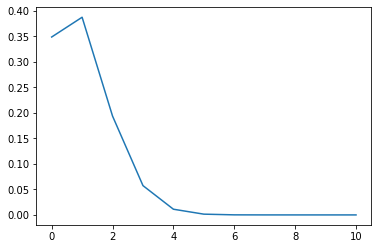

In [56]:
exemplo1 = pdf.subs({p:0.1,n:10})
d = density(exemplo1)
pyplot.plot([d(i) for i in range(11)])

1. Uma peça defeituosa? 

In [16]:
P(Eq(exemplo1,1))

0.387420489000000

2. Nenhuma peça defeituosa?

In [17]:
P(Eq(exemplo1, 0))

0.348678440100000

3. Duas peças defeituosas?

In [18]:
P(Eq(exemplo1, 2))

0.193710244500000

4. No mínimo duas peças defeituosas?

In [19]:
N(P(nsimplify(Ge(exemplo1, 2))))

0.263901070900000

5. No máximo duas peças defeituosas?

In [20]:
N(P(nsimplify(Le(exemplo1, 2)))) # necessario fazer esta transformacao devido ao bug no sympy

0.929809173600000

## Exemplo 2
Suponha que um aluno pretende fazer um teste de múltipla escolha com 10 questões e cinco alternativas por questão respondendo cada uma das questões de forma aleatória. Qual é probabilidade dele acertar no máximo 3 questões?

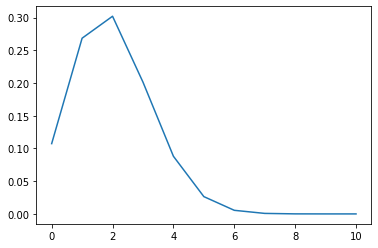

In [21]:
exemplo2 = pdf.subs({p:0.2,n:10})
d = density(exemplo2)
pyplot.plot([d(i) for i in range(11)])

In [22]:
N(P(nsimplify(Le(exemplo2, 3))))

0.879126118400000

## Exemplo 3

Uma moeda não viciada é lançada várias vezes. Qual a probabilidade de que obtermos 5 caras antes de obtermos 3 coroas?

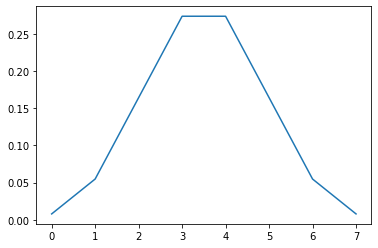

In [23]:
exemplo3 = pdf.subs({p:0.5,n:7})
d = density(exemplo3)
pyplot.plot([d(i) for i in range(8)])

In [24]:
P(Ge(exemplo3, 5))

0.226562500000000

## Exemplo 4

(Problema da caixa de fosforo de Banach) Suponha que um homem ande sempre com duas caixas de fósforos com n palitos cada uma. Suponha também que cada vez que ele necessite usar um fósforo ele pegue de forma aleatória em qualquer uma das caixas. Como ele é uma pessoa distraída quando ele pega o último palito da caixa de fósforos ele não se lembra de joga-la fora. Qual a probabilidade de que quando ele perceba que uma das caixas está vazia a outra contenha exatamente k fósforos?

In [62]:
X.subs({p:0.5, n:2*n-k,k:n})

0.5**(-k + 2*n)